In [1]:
# Sample API
import flowx
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40
xmin, xmax = 0.0, 1.0
ymin, ymax = 0.0, 1.0

# Re   = 100.0
# dt   = 0.01
# tmax = 10.

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 1.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=10.0, dt=0.01, Re=100.0)

In [3]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

poisson_options = dict(maxiter = 2000, tol = 1e-9)
poisson_options['lu'], poisson_options['mtx'] = flowx.poisson.build_sparse(gridc, 'pres')

while scalars.variable['time'] <= scalars.variable['tmax']:
    for i in range (0,3):
    
        # Predictor Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor',i=i)

        # Divergence Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence',i=i)
    
        # Solve the pressure Poisson equation 
        scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_lu(gridc, 'pres', 'divv', 
                                                                             poisson_options)
    
        # Corrector Step
        flowx.ins.rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector',i=i)
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   

    scalars.advance()

------------ Time = 0.0 ---------------
Number of poisson iterations    : None
Final poisson residual : 8.034383336117753e-12
Max, Min, U   : 2.0, -0.04525661842929221
Max, Min, V   : 0.12879727959044152, -0.12879727959044152
Max, Min, P   : 1.6350941770784284, -1.596070288977906
Max, Min, DIV : 1.0907941216942163e-14, -1.2323475573339238e-14


------------ Time = 0.09999999999999999 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.8235357882064812e-12
Max, Min, U   : 2.0, -0.13159828129278542
Max, Min, V   : 0.30455955546049945, -0.30873754231650685
Max, Min, P   : 1.17883563506094, -0.8705264655905562
Max, Min, DIV : 9.325873406851315e-15, -9.242606680004428e-15


------------ Time = 0.20000000000000004 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.368479846468887e-12
Max, Min, U   : 2.0, -0.15147814931809117
Max, Min, V   : 0.31894320278854243, -0.36887575084742646
Max, Min, P   : 1.1793451159820267, -0.78855571814

------------ Time = 2.6999999999999864 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.0149930021957192e-12
Max, Min, U   : 2.0, -0.23363026165969944
Max, Min, V   : 0.34604324394564473, -0.5092527997113947
Max, Min, P   : 1.293018047408133, -0.6926344567053611
Max, Min, DIV : 1.099120794378905e-14, -1.0658141036401503e-14


------------ Time = 2.7999999999999843 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.7867261109894991e-12
Max, Min, U   : 2.0, -0.23378910713634604
Max, Min, V   : 0.34607261337676953, -0.5099986057733196
Max, Min, P   : 1.2923842149110816, -0.6940609883341748
Max, Min, DIV : 1.099120794378905e-14, -1.0574874309554616e-14


------------ Time = 2.899999999999982 ---------------
Number of poisson iterations    : None
Final poisson residual : 1.9495072696553953e-12
Max, Min, U   : 2.0, -0.23416684720609907
Max, Min, V   : 0.3460992284000807, -0.5106744726288052
Max, Min, P   : 1.3028018843080758, -0

------------ Time = 5.299999999999931 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1800048464328902e-12
Max, Min, U   : 2.0, -0.23795727274344525
Max, Min, V   : 0.34636664314672827, -0.5174768250724175
Max, Min, P   : 1.3159068010180697, -0.6803675329537108
Max, Min, DIV : 1.0720591081536668e-14, -1.1157741397482823e-14


------------ Time = 5.399999999999929 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.2024855177741113e-12
Max, Min, U   : 2.0, -0.23800507111565164
Max, Min, V   : 0.34637081263164776, -0.5175840754238629
Max, Min, P   : 1.3057922682737735, -0.6906533364567278
Max, Min, DIV : 1.2656542480726785e-14, -1.124100812432971e-14


------------ Time = 5.499999999999927 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.242716522466873e-12
Max, Min, U   : 2.0, -0.23813130930346446
Max, Min, V   : 0.34637473353135073, -0.5176850258840144
Max, Min, P   : 1.309259210989339, -0.

------------ Time = 7.899999999999876 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.407681336577134e-12
Max, Min, U   : 2.0, -0.23946155582904574
Max, Min, V   : 0.34642363611683047, -0.5189537534644167
Max, Min, P   : 1.3220915943318856, -0.6766242934287362
Max, Min, DIV : 9.992007221626409e-15, -1.049160758270773e-14


------------ Time = 7.999999999999874 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.411802358489903e-12
Max, Min, U   : 2.0, -0.23948250497882806
Max, Min, V   : 0.34642456250581105, -0.5189779985926647
Max, Min, P   : 1.3196002988608095, -0.6791570904087995
Max, Min, DIV : 1.3322676295501878e-14, -1.0241807402167069e-14


------------ Time = 8.099999999999872 ---------------
Number of poisson iterations    : None
Final poisson residual : 2.1654722179790955e-12
Max, Min, U   : 2.0, -0.2395021846640416
Max, Min, V   : 0.34642543880974186, -0.5190009416813892
Max, Min, P   : 1.3117130889086683, -0.68

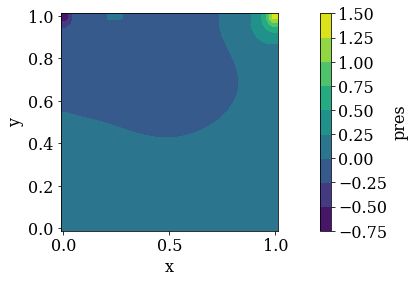

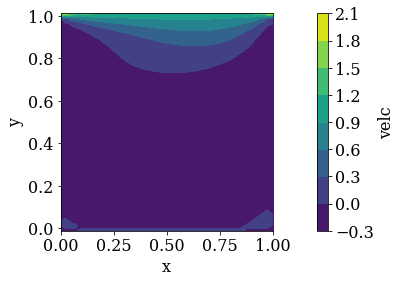

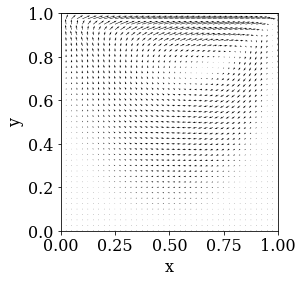

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
#flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx,gridy,'velc')